<a href="https://colab.research.google.com/github/Jorge-89/Regresiones_TP_UNSAM/blob/main/Red_Neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy
import pandas as pd
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#se importa el set de datos
url = 'https://raw.githubusercontent.com/Jorge-89/Regresion-Lineal-/main/base_datos_estaciones_met_V3_train.csv'
df = pd.read_csv(url, sep=",")
df.columns

Index(['Unnamed: 0', 'fecha_completa', 'Fecha', 'Hora',
       'Temp_Alicia AgriculturaCba', 'Humedad_Alicia AgriculturaCba',
       'PP_Alicia AgriculturaCba', 'Temp_Las Varas AgriculturaCba',
       'Humedad_Las Varas AgriculturaCba', 'PP_Las Varas AgriculturaCba',
       'Temp_San Miguel - Establecimiento Don Luis',
       'Humedad_San Miguel - Establecimiento Don Luis',
       'PP_San Miguel - Establecimiento Don Luis',
       'Temp_San Miguel - Listello', 'Humedad_San Miguel - Listello',
       'PP_San Miguel - Listello', 'Temp_ San Miguel - Las Varillas',
       'Humedad_ San Miguel - Las Varillas', 'PP_ San Miguel - Las Varillas'],
      dtype='object')

In [3]:

x= df[[ 'Temp_Las Varas AgriculturaCba', 'Humedad_Las Varas AgriculturaCba',
        'Temp_San Miguel - Establecimiento Don Luis', 'Humedad_San Miguel - Establecimiento Don Luis',
       'Temp_San Miguel - Listello', 'Humedad_San Miguel - Listello',
       'Temp_ San Miguel - Las Varillas', 'Humedad_ San Miguel - Las Varillas']]
y= df["Temp_Alicia AgriculturaCba"]

In [4]:
#Separo los datos de "train" en entrenamiento y prueba "test" para probar los algoritmos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [63]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [64]:
#Estandarizo las features, las redes son muy sensibles a datos no escalados.
scaler_labels = StandardScaler()
x_train = scaler_labels.fit_transform(x_train)
x_test = scaler_labels.transform(x_test)

In [65]:
# Introducing the stars
import tensorflow as tf
from tensorflow import keras

In [66]:
#Defino la función neuronal
def define_model():
    keras.backend.clear_session()
    
    model = keras.models.Sequential()

    # Capa de entrada, con 8 variables
    model.add(keras.layers.Flatten(input_dim=8))
    

    # 2 capas ocultas con función de activación linear, podemos usar tambien relu.
     
               
    model.add(keras.layers.Dense(32, kernel_initializer='normal', activation='linear'))
   
    model.add(keras.layers.Dense(16, kernel_initializer='normal', activation='linear'))
    

    # Capa de salida
    model.add(keras.layers.Dense(1, input_dim=8,kernel_initializer='normal', activation='linear'))
    model.compile(loss='mse', metrics=['mse', 'mae'], optimizer="Adam")

   
    return model





In [67]:
 model = define_model()
# Hago una corrida sin metodo de regularizacion.  
history = model.fit(epochs=100, batch_size=30, x=x_train, y=y_train, validation_data=(x_test, y_test) )
#                     callbacks=[early,])



Epoch 1/30
277/277 [==============================] - 1s 2ms/step - loss: 287.7977 - mse: 287.7977 - mae: 14.7643 - val_loss: 0.7464 - val_mse: 0.7464 - val_mae: 0.6716
Epoch 2/30
277/277 [==============================] - 0s 1ms/step - loss: 0.6650 - mse: 0.6650 - mae: 0.6461 - val_loss: 0.6898 - val_mse: 0.6898 - val_mae: 0.6508
Epoch 3/30
277/277 [==============================] - 0s 1ms/step - loss: 0.6487 - mse: 0.6487 - mae: 0.6355 - val_loss: 0.6848 - val_mse: 0.6848 - val_mae: 0.6477
Epoch 4/30
277/277 [==============================] - 0s 1ms/step - loss: 0.6502 - mse: 0.6502 - mae: 0.6360 - val_loss: 0.6727 - val_mse: 0.6727 - val_mae: 0.6422
Epoch 5/30
277/277 [==============================] - 0s 1ms/step - loss: 0.6424 - mse: 0.6424 - mae: 0.6315 - val_loss: 0.6629 - val_mse: 0.6629 - val_mae: 0.6387
Epoch 6/30
277/277 [==============================] - 0s 1ms/step - loss: 0.6498 - mse: 0.6498 - mae: 0.6350 - val_loss: 0.6673 - val_mse: 0.6673 - val_mae: 0.6402
Epoch 7/30


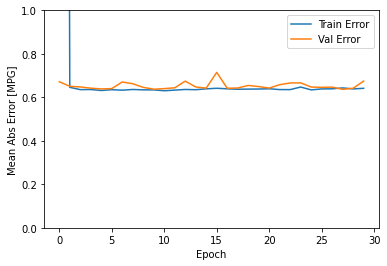

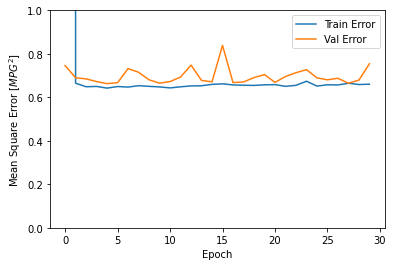

In [68]:


# se puede observar como el error de entrenamiento va disminuyendo, pero el de validación aumenta. Un claro sobreajuste
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,1])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,1])
  plt.legend()
  plt.show()


plot_history(history)

In [69]:
y_pred_test = model.predict(x_test)
y_pred_test

array([[24.247372],
       [27.28409 ],
       [14.381   ],
       ...,
       [34.471577],
       [27.88645 ],
       [29.385937]], dtype=float32)

In [70]:
print('Precisión del modelo usando la raíz del error cuadratico medio (RMSE):')
score_testeo = mean_squared_error(y_test,y_pred_test,squared= True)

print (score_testeo)

Precisión del modelo usando la raíz del error cuadratico medio (RMSE):
0.7544997704624087


In [71]:
# To start from scratch, siempre aplicar esto antes de tocar otros hiperparametros o construir otro modelo, mas info en https://keras.io/api/utils/backend_utils/
keras.backend.clear_session()




In [72]:
#Early es un buen metodo de regularizacion, en patience aplicamos un 20 para que al menos tengan que pasar 20 epoch antes de hacer una parada.
early = keras.callbacks.EarlyStopping(patience=20, monitor='val_loss', restore_best_weights=True)

In [73]:
 model = define_model()
 model.compile(loss='mse', metrics=['mse', 'mae'], optimizer="Adam")
 #en regresión las loss usada es mse y como metrica tambien la podemos usar, como optimizador es sumamente usado Adam
history = model.fit(epochs=150, batch_size=30, x=x_train, y=y_train, validation_data=(x_test, y_test),
                    callbacks=[early])

Epoch 1/150
277/277 [==============================] - 1s 2ms/step - loss: 291.2911 - mse: 291.2911 - mae: 14.8388 - val_loss: 0.7358 - val_mse: 0.7358 - val_mae: 0.6752
Epoch 2/150
277/277 [==============================] - 0s 1ms/step - loss: 0.6774 - mse: 0.6774 - mae: 0.6509 - val_loss: 0.6907 - val_mse: 0.6907 - val_mae: 0.6581
Epoch 3/150
277/277 [==============================] - 0s 1ms/step - loss: 0.6544 - mse: 0.6544 - mae: 0.6412 - val_loss: 0.6728 - val_mse: 0.6728 - val_mae: 0.6465
Epoch 4/150
277/277 [==============================] - 0s 1ms/step - loss: 0.6533 - mse: 0.6533 - mae: 0.6398 - val_loss: 0.7115 - val_mse: 0.7115 - val_mae: 0.6596
Epoch 5/150
277/277 [==============================] - 0s 1ms/step - loss: 0.6447 - mse: 0.6447 - mae: 0.6346 - val_loss: 0.6748 - val_mse: 0.6748 - val_mae: 0.6471
Epoch 6/150
277/277 [==============================] - 0s 1ms/step - loss: 0.6468 - mse: 0.6468 - mae: 0.6349 - val_loss: 0.6710 - val_mse: 0.6710 - val_mae: 0.6414
Epoch

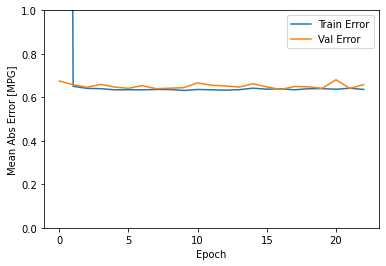

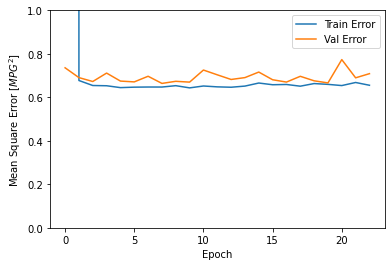

In [76]:
# vemos como se regula el modelo evitando el sobreajuste

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,1])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,1])
  plt.legend()
  plt.show()


plot_history(history)

In [74]:
y_pred_test = model.predict(x_test)
y_pred_test

array([[24.434216],
       [27.128744],
       [14.70011 ],
       ...,
       [34.159615],
       [27.75644 ],
       [29.08174 ]], dtype=float32)

In [75]:
print('Precisión del modelo usando la raíz del error cuadratico medio (RMSE):')
score_testeo = mean_squared_error(y_test,y_pred_test,squared= True)

print (score_testeo)

Precisión del modelo usando la raíz del error cuadratico medio (RMSE):
0.6640623829872061


In [85]:
    # To start from scratch
keras.backend.clear_session()
#Luego de tener un modelo con regularización es conveniente usar un CV y tener un mse para ver como se comporta con datos que nunca observo.
regressor = KerasRegressor(build_fn = define_model, batch_size = 30, epochs = 30)
errores = cross_val_score(regressor, x_test, y_test, cv = 5, scoring='neg_mean_squared_error', n_jobs=-1)
errores = -errores
errores

KeyboardInterrupt: ignored

In [78]:

print(errores.mean(), errores.std())

0.6798724628820901 0.039836108254761596


**Esta parte es opcional, ya que se construye una grilla para saber que hiperparametros pueden ser mejores, pero consume al menos 1 hora.**

In [86]:
def define_model(optimizer,activation):
    keras.backend.clear_session()
    
    model = keras.models.Sequential()

    # Input layer
    model.add(keras.layers.Flatten(input_dim=8))
    

    # Two hidden layers with 32 units each
    model.add(keras.layers.Dense(64, kernel_initializer='normal', activation='relu'))
    
               
    model.add(keras.layers.Dense(32, kernel_initializer='normal', activation='relu'))
   
    model.add(keras.layers.Dense(16, kernel_initializer='normal', activation='relu'))
    

    # Output layer. As this is a multi-class classification problem, use K (here 10) units.
    model.add(keras.layers.Dense(1, input_dim=8,kernel_initializer='normal', activation='relu'))
    model.compile(loss='mse', metrics=['mse', 'mae'], optimizer=optimizer)

   
    return model


In [89]:
keras.backend.clear_session()

In [90]:

regressor = KerasRegressor(build_fn = define_model)


In [91]:
parameters= {"batch_size": [25,32], "epochs":[100,200], "optimizer":["Adam", "rmsprop"], "activation":["relu","linear"]}

In [92]:
grilla = GridSearchCV(estimator=regressor, param_grid= parameters,scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)
                      
                      
grilla.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 23.6min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 40.6min finished


Epoch 1/100
260/260 [==============================] - 1s 1ms/step - loss: 212.1447 - mse: 212.1447 - mae: 11.8410
Epoch 2/100
260/260 [==============================] - 0s 1ms/step - loss: 7.9486 - mse: 7.9486 - mae: 1.9308
Epoch 3/100
260/260 [==============================] - 0s 1ms/step - loss: 0.7337 - mse: 0.7337 - mae: 0.6684
Epoch 4/100
260/260 [==============================] - 0s 1ms/step - loss: 0.6653 - mse: 0.6653 - mae: 0.6399
Epoch 5/100
260/260 [==============================] - 0s 1ms/step - loss: 0.6610 - mse: 0.6610 - mae: 0.6386
Epoch 6/100
260/260 [==============================] - 0s 1ms/step - loss: 0.6502 - mse: 0.6502 - mae: 0.6327
Epoch 7/100
260/260 [==============================] - 0s 1ms/step - loss: 0.6490 - mse: 0.6490 - mae: 0.6314
Epoch 8/100
260/260 [==============================] - 0s 1ms/step - loss: 0.6477 - mse: 0.6477 - mae: 0.6320
Epoch 9/100
260/260 [==============================] - 0s 1ms/step - loss: 0.6468 - mse: 0.6468 - mae: 0.6328
Epoch

GridSearchCV(cv=5, error_score=nan,
             estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f428d0b1390>,
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['relu', 'linear'],
                         'batch_size': [25, 32], 'epochs': [100, 200],
                         'optimizer': ['Adam', 'rmsprop']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=1)

In [93]:
grilla.best_params_

{'activation': 'linear', 'batch_size': 32, 'epochs': 100, 'optimizer': 'Adam'}

In [94]:
grilla.best_score_

-0.6343268432237279

In [95]:
# Fit best model
modelo=grilla.best_estimator_


In [96]:

#se puede usar scoring='neg_root_mean_squared_error' tambien que seria la raiz
MSE_modelo=cross_val_score(modelo,x_test,y_test,cv=5,scoring='neg_mean_squared_error')
errores = -MSE_modelo
MSE_modelo

Epoch 1/100
52/52 [==============================] - 0s 1ms/step - loss: 513.0964 - mse: 513.0964 - mae: 21.8877
Epoch 2/100
52/52 [==============================] - 0s 1ms/step - loss: 264.8586 - mse: 264.8586 - mae: 14.4842
Epoch 3/100
52/52 [==============================] - 0s 1ms/step - loss: 78.5746 - mse: 78.5746 - mae: 7.3262
Epoch 4/100
52/52 [==============================] - 0s 1ms/step - loss: 60.6968 - mse: 60.6968 - mae: 6.4488
Epoch 5/100
52/52 [==============================] - 0s 1ms/step - loss: 39.7255 - mse: 39.7255 - mae: 5.2634
Epoch 6/100
52/52 [==============================] - 0s 1ms/step - loss: 17.8972 - mse: 17.8972 - mae: 3.4869
Epoch 7/100
52/52 [==============================] - 0s 1ms/step - loss: 5.7775 - mse: 5.7775 - mae: 1.9226
Epoch 8/100
52/52 [==============================] - 0s 2ms/step - loss: 2.1890 - mse: 2.1890 - mae: 1.1530
Epoch 9/100
52/52 [==============================] - 0s 1ms/step - loss: 1.2406 - mse: 1.2406 - mae: 0.8505
Epoch 10/1

array([-0.64012906, -0.69026436, -0.76764861, -0.60549866, -0.7820173 ])

In [97]:
print(errores.mean(), errores.std())

0.6971115972038222 0.06909598209430678
